### CLASIFICADOR DE IMAGENES, APLICANDO REDES NEURONALES

In [12]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import cv2

In [13]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import losses
from tensorflow.keras.optimizers import Adagrad

### Cargamos el dataaset de Imágenes

* Este dataset esta distribuido en carpetas, es decir, separado por razas.
* Tambien se puede tener todo el conjutno de imanges en una sola carpeta. 

Este segmento de código recorre un directorio y los subdirectorios, lee las imagenes que contiene cada directorio, muestra información sobre el progreso y muestra estadisticas sobre la distribución de las imagenes. 

In [15]:
#dirname = os.path.join(os.getcwd(), 'imagenesRazas3')
#dirname = os.path.join(os.getcwd(), 'mascotas')
dirname = os.path.join(os.getcwd(), 'razas')
#dirname = os.path.join(os.getcwd(), 'prueba')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  c:\Users\Lalo\Documents\proyectos Python\clasificador de imagenes\razas\
c:\Users\Lalo\Documents\proyectos Python\clasificador de imagenes\razas\American Bulldog 1
c:\Users\Lalo\Documents\proyectos Python\clasificador de imagenes\razas\Basset Hound 200
c:\Users\Lalo\Documents\proyectos Python\clasificador de imagenes\razas\Beagle 200
c:\Users\Lalo\Documents\proyectos Python\clasificador de imagenes\razas\Boxer 200
c:\Users\Lalo\Documents\proyectos Python\clasificador de imagenes\razas\Bull Terrier 200
c:\Users\Lalo\Documents\proyectos Python\clasificador de imagenes\razas\Chihuhua 191
c:\Users\Lalo\Documents\proyectos Python\clasificador de imagenes\razas\Cocker 200
c:\Users\Lalo\Documents\proyectos Python\clasificador de imagenes\razas\German Shorthaired 200
c:\Users\Lalo\Documents\proyectos Python\clasificador de imagenes\razas\Great Pyrenees 200
c:\Users\Lalo\Documents\proyectos Python\clasificador de imagenes\razas\Havanese 200
c:\Users\Lalo\Documents\proyectos

### Creamos las etiquetas para el conjunto de imagenes.

Generamos las atiquetas para las imágenes leidas y cargadas del código anterior.

In [16]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  4990


### Mostramos el nombre de todas las razas en este conjunto de imagenes.

En este segmento de código iteramos sobre los directorios donde se encuentran las imágenes, extrae el nombre de cada directoio, mostramos información sobre índice y el nombre de la raza.

In [17]:
razas=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    razas.append(name[len(name)-1])
    indice=indice+1


0 American Bulldog
1 Basset Hound
2 Beagle
3 Boxer
4 Bull Terrier
5 Chihuhua
6 Cocker
7 German Shorthaired
8 Great Pyrenees
9 Havanese
10 Japanesse Chin
11 Keeshond
12 Leonberger
13 Miniature Pinsher
14 Newfoundland
15 Pitbull
16 Pomeranian
17 Pug
18 Saint Bernard
19 Samoyed
20 Setter
21 Shibainu
22 Terrier
23 Wheaten Terrier
24 Yorkishiere Tierrer


### En este punto realizamos la operación de redimensionar todoas las imagenes y que sean todas de un mismo tamaño.

In [ ]:
dirname = os.path.join(os.getcwd(), 'mascotas')
imgpath = dirname + os.sep 

images_resized = []

desired_size = (1024, 1024)

print("Leyendo imágenes de ", imgpath)

for root, _, filenames in os.walk(imgpath):
    for filename in filenames:
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
            filepath = os.path.join(root, filename)
            image = cv2.imread(filepath)
            image_resized = cv2.resize(image, desired_size)
            images_resized.append(image_resized)

print("Cantidad de imágenes redimensionadas:", len(images_resized))

In [ ]:
for image_resized in images_resized:
    print(image_resized.shape)


In [18]:
import os
import cv2
import numpy as np

# Directorio de las imágenes
dirname = os.path.join(os.getcwd(), 'razas')
imgpath = dirname + os.sep 

images_resized = []
labels = []

desired_size = (128, 128)

print("Leyendo imágenes de ", imgpath)

for root, _, filenames in os.walk(imgpath):
    for filename in filenames:
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
            filepath = os.path.join(root, filename)
            image = cv2.imread(filepath)
            if image is not None:
                image_resized = cv2.resize(image, desired_size)
                if image_resized.shape == (128, 128, 3):  # Verificar si el redimensionamiento fue exitoso
                    images_resized.append(image_resized)
                    labels.append(root.split(os.sep)[-1])  # Asumiendo que el nombre de la carpeta es la etiqueta
                else:
                    print(f"Image at {filepath} could not be resized to {desired_size}.")
            else:
                print(f"Image at {filepath} could not be read.")

print("Cantidad de imágenes redimensionadas:", len(images_resized))

# Convertir la lista de imágenes a un array NumPy
if len(images_resized) > 0:
    X = np.array(images_resized, dtype=np.uint8)
    y = np.array(labels)

    classes = np.unique(y)
    nClasses = len(classes)
    print('Número total de salidas : ', nClasses)
    print('Salidas de clases : ', classes)
else:
    print("No se redimensionaron imágenes correctamente.")

Leyendo imágenes de  c:\Users\Lalo\Documents\proyectos Python\clasificador de imagenes\razas\
Cantidad de imágenes redimensionadas: 4990
Número total de salidas :  25
Salidas de clases :  ['American Bulldog' 'Basset Hound' 'Beagle' 'Boxer' 'Bull Terrier'
 'Chihuhua' 'Cocker' 'German Shorthaired' 'Great Pyrenees' 'Havanese'
 'Japanesse Chin' 'Keeshond' 'Leonberger' 'Miniature Pinsher'
 'Newfoundland' 'Pitbull' 'Pomeranian' 'Pug' 'Saint Bernard' 'Samoyed'
 'Setter' 'Shibainu' 'Terrier' 'Wheaten Terrier' 'Yorkishiere Tierrer']


### Preparacion de los datos.

En este segemento de código preparamos los datos para su uso en la aplicación del algun modelo de aprendizaje automatico.

Convertimos las etiquetas de las imagenes en arrays Nump y damos informacion sobre las clases presentes en las etiquetas.

In [ ]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8)

classes = np.unique(y)
nClasses = len(classes)
print('Numero total de salidas : ', nClasses)
print('Salidas de clases : ', classes)

### Crecion de los Sets y Test de Entrenamiento

A parti de este segmento de código realizamos la división de los datos en conjunto de entrenamiento y prueba, donde el 80% de los datos son para entrenamiento y el 20% de los datos son para prueba. 

In [19]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Datos de entrenamiento : ', train_X.shape, train_Y.shape)
print('Datos de prueba : ', test_X.shape, test_Y.shape)

Datos de entrenamiento :  (3992, 128, 128, 3) (3992,)
Datos de prueba :  (998, 128, 128, 3) (998,)


### Visualización de imagenes

En este segmento de codigo vamos a visualizar las imagnes con sus respectivas etiquetas, una del conjunto de entrenamiento y tra del conjunto de prueba. 

Text(0.5, 1.0, 'Ground Truth : Wheaten Terrier')

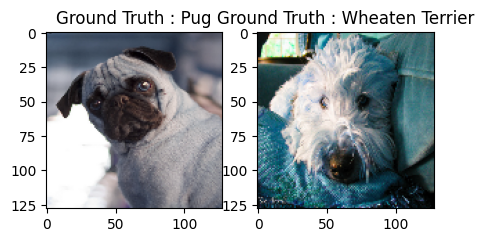

In [23]:
plt.figure(figsize=[5,5])


plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))


plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

En este segmento de codigo casi igual al anterior, pero con la modificaion que mostramos las imagnes que nosotros deseamos y tambienn podemos ajustar el tamaño y la trama del conjunto de entrenamiento y prueba.

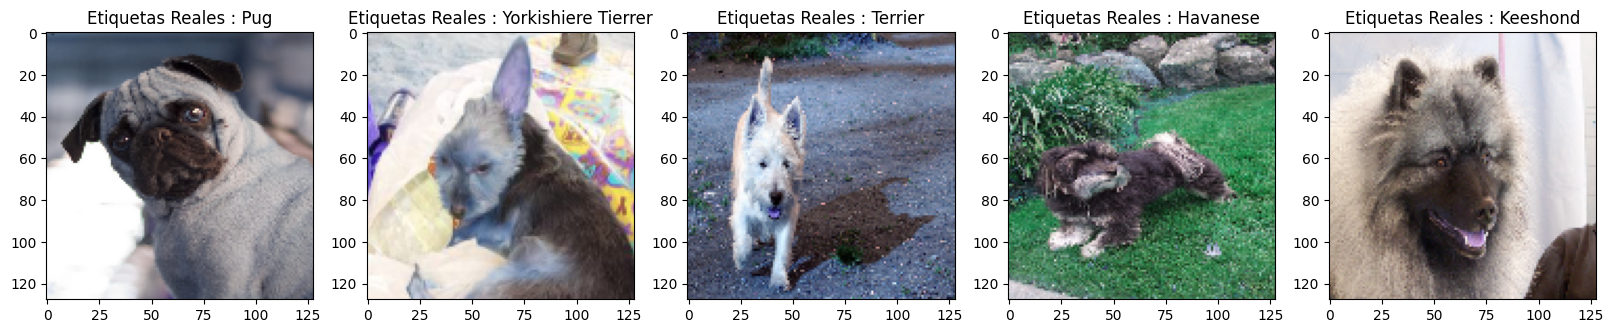

In [24]:
plt.figure(figsize=[20, 10]) #tamaño y tramas 
num_imagenes = 5 #imagnes a mostrar 

for i in range(num_imagenes):
    plt.subplot(1, num_imagenes, i+1)  # Ajusta el número de filas y columnas según sea necesario
    plt.imshow(train_X[i, :, :], cmap='gray')  # Muestra las imágenes de entrenamiento, cambia train_X por tus datos de entrenamiento
    plt.title("Etiquetas Reales : {}".format(train_Y[i]))  # Ajusta train_Y[i] según sea necesario

plt.show()

En este segmento de código creamo una cuadrícula de imágenes, que incluyen de entrenmiento y prueba, se puede ajustar para controlar cuantas imágnes se muestren en la cuadrícula.

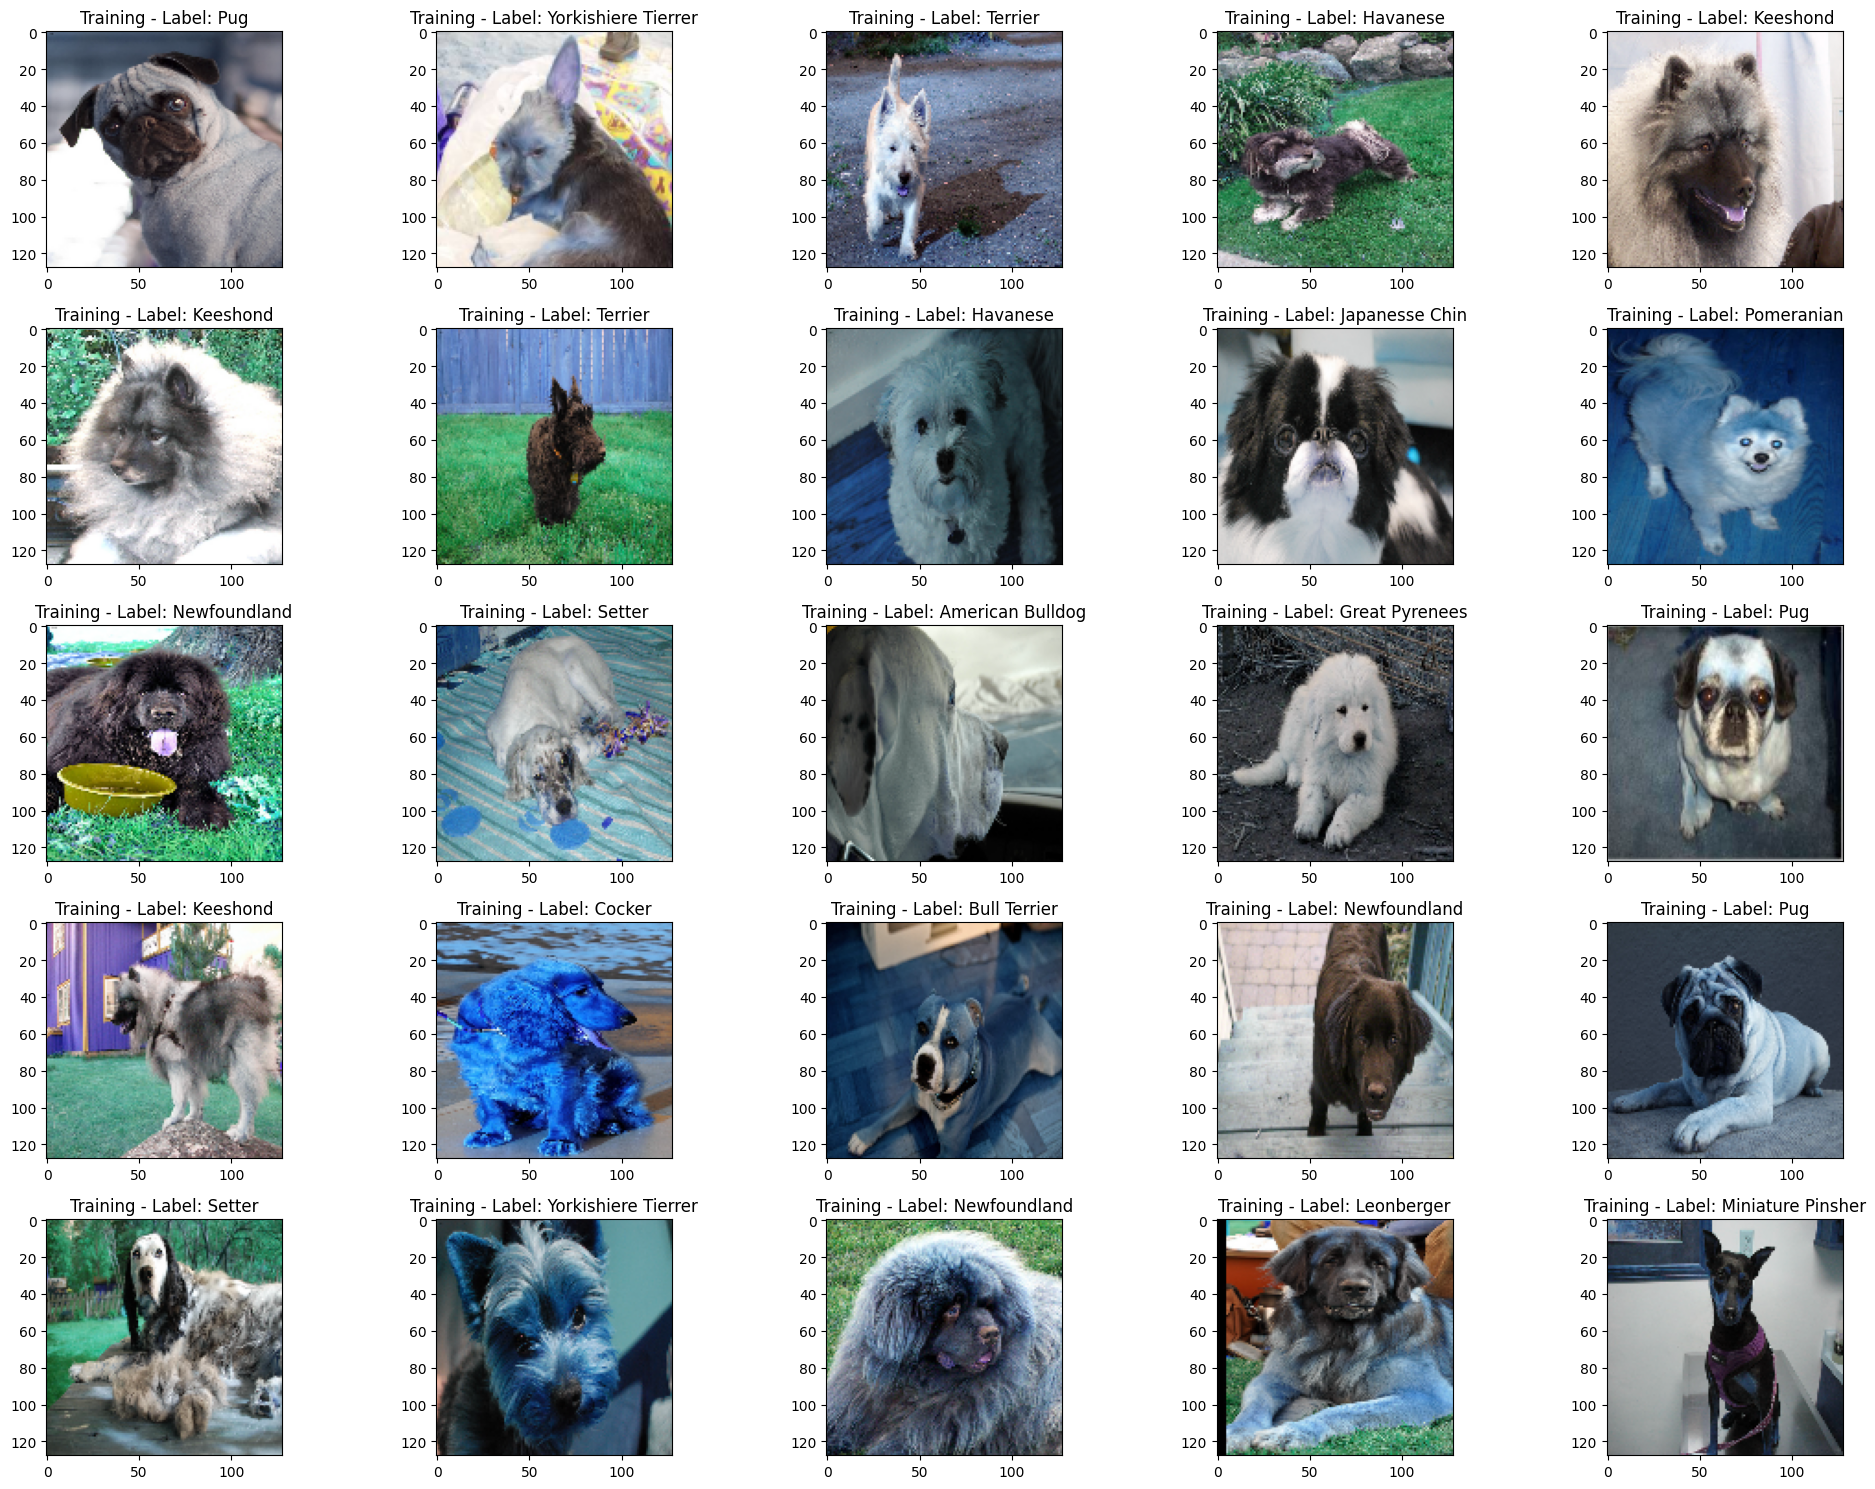

In [25]:
# Especifica el número de filas y columnas para la cuadrícula de imágenes
num_rows = 5
num_cols = 5

# Crea una figura con subgráficos en una cuadrícula
plt.figure(figsize=(20, 15))

# Itera sobre las primeras 8 imágenes del conjunto de entrenamiento y prueba
for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    
    # Selecciona la imagen y etiqueta correspondiente
    if i < len(train_X):
        current_image = train_X[i, :, :]
        current_label = train_Y[i]
        data_type = "Training"
    else:
        current_image = test_X[i - len(train_X), :, :]
        current_label = test_Y[i - len(train_X)]
        data_type = "Testing"
    
    # Muestra la imagen en escala de grises
    plt.imshow(current_image, cmap='gray')
    
    # Añade un título con la etiqueta correspondiente
    plt.title("{} - Label: {}".format(data_type, current_label))

# Ajusta el diseño y muestra la figura
plt.tight_layout()
plt.show()

### Preprocesamos las imagenes

En este segmento de codigo vamos a realizar la normalizacion de las imagenes en los conjuntos de entrenamiento.

Vamos a convertir los valores de las imagenes en el conjunto de entrenamiento al tipo de dato flotante de 32 bits, esto para asegurarnos de tener una representacion mas precisa de los valores.

In [26]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

En este segmento de código vamos a realizar la conversión de etiquetas a la codificacion one-hot de Keras.

Utiizaoms la función to_categorical(), para tomar las etiquetas y convertirlas en formato binario, esto para el train, test. 

Esto se ocupa normalmente para problemas de clasificacion multiclase, la representacion one-hot es util para entrenas modelos de aprendisaje automatico, especial en redes neuronales.

In [29]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Asumiendo que ya tienes las imágenes redimensionadas en 'images_resized' y las etiquetas en 'labels'

# Convertir las etiquetas de texto a etiquetas numéricas
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(images_resized, integer_encoded, test_size=0.2, random_state=42)

# Convertir las etiquetas numéricas a one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Etiqueta original:', train_Y[0])
print('Etiqueta one-hot:', train_Y_one_hot[0])

Etiqueta original: 7
Etiqueta one-hot: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [30]:

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
print('Etiqueta original:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Etiqueta original: 7
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### Creamos el Set de Entrenamiento y Validación

In [31]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)


En este segmento de codigo vamos a imprimir las dimensiones de las cuatro variables. Cada una de estas variables representa un conjunto de datos diferentes. 

In [33]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Definir la ruta y el tamaño deseado de las imágenes
dirname = os.path.join(os.getcwd(), 'razas')
imgpath = dirname + os.sep
desired_size = (128, 128)

# Leer y redimensionar las imágenes
images_resized = []
labels = []  # Supongo que ya tienes tus etiquetas en una lista

print("Leyendo imágenes de ", imgpath)

for root, _, filenames in os.walk(imgpath):
    for filename in filenames:
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
            filepath = os.path.join(root, filename)
            image = cv2.imread(filepath)
            image_resized = cv2.resize(image, desired_size)
            images_resized.append(image_resized)
            # Asegúrate de que la etiqueta correspondiente se agregue a la lista de etiquetas
            labels.append(root.split(os.sep)[-1])  # Supone que la carpeta con las imágenes es la etiqueta

print("Cantidad de imágenes redimensionadas:", len(images_resized))

# Convertir la lista de imágenes a un array de NumPy
images_resized = np.array(images_resized)

# Convertir las etiquetas de texto a etiquetas numéricas
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_X, test_X, train_Y, test_Y = train_test_split(images_resized, integer_encoded, test_size=0.2, random_state=42)

# Convertir las etiquetas numéricas a one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Verificar las formas de los conjuntos de datos
print("Muestras y Características: ", train_X.shape)
print("Conjunto de Validación: ", test_X.shape)
print("Nuevo conjunto después de la división: ", train_Y_one_hot.shape)

print('Etiqueta original:', train_Y[0])
print('Etiqueta one-hot:', train_Y_one_hot[0])


Leyendo imágenes de  c:\Users\Lalo\Documents\proyectos Python\clasificador de imagenes\razas\
Cantidad de imágenes redimensionadas: 4990
Muestras y Características:  (3992, 128, 128, 3)
Conjunto de Validación:  (998, 128, 128, 3)
Nuevo conjunto después de la división:  (3992, 25)
Etiqueta original: 7
Etiqueta one-hot: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### Modelo de CNN

INIT_LR: Establece el learning rate inicial para un modelo de aprendizaje automatico. Es un hiperparámetro que controla la magnitud de los ajustes que realiza el optimizador durante el entrenamiento. Entre más bajo es el rate significa ajustes mas pequeños y esto es util para la covergencia del modelo.

epochos: Definimos el numero de épocas o iteraciones completas a través del conjunto de entrenamiento durante el entrnamiento del modelo. Cada época implica que l modelo vea todos lo ejemplos de entrenamiento una vez. Este valor los podemos ajustar según sea necesario para losgrar un quilibrios entre una entrenamiento sufuciente  evitar el sobreajuste.

batch_size = 64: Vamos a especificar el tamaño del lote, que es la cantidad de muestras qe se utilizan en una actualización de los pesos del modelo.  

In [35]:

INIT_LR = 1e-3 
epochs = 20
batch_size = 64 

### Red Neuronal Convolucional de Keras con TensorFlow 

1. Inciamos la construcción del modelo de red neuronal secuencia, donde las capas se apilan una encuma de la otra.
2. Agregamos una capa de convolución con 32 filtro y un tamaño de kernel de 3,3. La función de activación es lineal. La capa de relleno para mantener el tañano de salida igual que el tamaño de la entrada. La forma de entrada es (21, 28, 3) que es: alto, ancho, canales de color.
3. Agregamos una fucnion de activación Laeky ReLU con un coeficiente de inclinacion negativa  de 0.1. Agregamos una capa de max pooloin con un tamaño de pool de 2,2 y relleni para reducir la resolución espacial de la salida de la capa anterior.
4. Agregamos una capa de Dropout para regularizar el modelo, aelatoriamente apagando el 50% de las unidades durante el entrenamiento. Esto para prevenir el sobre ajuste.
5. Con Flatten, aplanamos la salida de la capa anterior para alimentar a una capa dendsa. Con Dense 32, linear, agremaos una capa densa con 32 unidades y una funcion de activación lineal.

### Este modelo de red neuronal convolucional consta de capas de convolución, funciones de activacion y capas densas. 


## Mas capas y Neuronas

razasimagenes_model.add(Dense(64, activation='relu')).

razasimagenes_model.add(Dense(128, activation='relu')).

## Tamaño de Kernel y Filtros.

razasimagenes_model.add(Conv2D(64, kernel_size=(5, 5), activation='linear', padding='same', input_shape=(21, 28, 3))).

razasimagenes_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same')).

## Para poder experimentar con mas funciones de activción

razasimagenes_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(21, 28, 3))).

razasimagenes_model.add(LeakyReLU(alpha=0.1)).

razasimagenes_model.add(Dense(64, activation='tanh')).

## Uso de arquitecturas mas avanzadas (Aun no se llega a esta parte de las redes preentrenadas).

from keras.applications import ResNet50.

Utilizar ResNet50 preentrenada.

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)).

## Agregar capas personalizadas al modelo base.

razasimagenes_model = Sequential().

razasimagenes_model.add(base_model).

razasimagenes_model.add(GlobalAveragePooling2D()).

razasimagenes_model.add(Dense(256, activation='relu')).

razasimagenes_model.add(Dense(nClasses, activation='softmax')).

In [36]:
razasimagenes_model = Sequential()
razasimagenes_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(128,128,3)))
razasimagenes_model.add(LeakyReLU(alpha=0.1))
razasimagenes_model.add(MaxPooling2D((2, 2),padding='same'))
razasimagenes_model.add(Dropout(0.5))

razasimagenes_model.add(Flatten())
razasimagenes_model.add(Dense(32, activation='linear'))
razasimagenes_model.add(LeakyReLU(alpha=0.1))
razasimagenes_model.add(Dropout(0.5))
razasimagenes_model.add(Dense(nClasses, activation='softmax'))

c:\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
c:\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [37]:
razasimagenes_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)      │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 32)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 131072)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 32)                │  4,194,336 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 32)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 25)                │        825 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 4,196,057 (16.01 MB)

 Trainable params: 4,196,057 (16.01 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
optimizer= tf.keras.optimizers.Adagrad(learning_rate=INIT_LR)
#optimizer_legacy = tf.keras.optimizers.legacy.Adagrad(learning_rate=INIT_LR) cambio por error de biblioteca

razasimagenes_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=optimizer,
    metrics=['accuracy']
)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Dropout, Flatten, Dense


train_X: Datos de entrenamiento (imágenes)

train_label: Etiquetas correspondientes a los datos de entrenamiento

batch_size=batch_size: Tamaño del lote utilizado durante el entrenamiento

epochs=epochs: Número de épocas (iteraciones completas a través de los datos de entrenamiento)

verbose=1: Nivel de verbosidad durante el entrenamiento (1 muestra progreso, 0 silencioso)

validation_data=(valid_X, valid_label): Datos de validación utilizados para evaluar el modelo después de cada época

In [41]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Definir la ruta y el tamaño deseado de las imágenes
dirname = os.path.join(os.getcwd(), 'razas')
imgpath = dirname + os.sep
desired_size = (128, 128)

# Leer y redimensionar las imágenes
images_resized = []
labels = []  # Supongo que ya tienes tus etiquetas en una lista

print("Leyendo imágenes de ", imgpath)

for root, _, filenames in os.walk(imgpath):
    for filename in filenames:
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
            filepath = os.path.join(root, filename)
            image = cv2.imread(filepath)
            if image is not None:  # Verificar que la imagen no sea None
                image_resized = cv2.resize(image, desired_size)
                images_resized.append(image_resized)
                # Asegúrate de que la etiqueta correspondiente se agregue a la lista de etiquetas
                labels.append(root.split(os.sep)[-1])  # Supone que la carpeta con las imágenes es la etiqueta
            else:
                print(f"Warning: Unable to read {filepath}. Skipping this file.")

print("Cantidad de imágenes redimensionadas:", len(images_resized))
print("Cantidad de etiquetas:", len(labels))

# Convertir la lista de imágenes a un array de NumPy
images_resized = np.array(images_resized)

# Convertir las etiquetas de texto a etiquetas numéricas
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)

# Verificar que las imágenes y las etiquetas tengan el mismo tamaño antes de la división
if len(images_resized) != len(integer_encoded):
    raise ValueError("El número de imágenes y etiquetas no coincide. Verifica tus datos.")

# Dividir los datos en conjuntos de entrenamiento y prueba
train_X, test_X, train_Y, test_Y = train_test_split(images_resized, integer_encoded, test_size=0.2, random_state=42)

# Convertir las etiquetas numéricas a one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Verificar las formas de los conjuntos de datos
print("Muestras y Características (entrenamiento): ", train_X.shape)
print("Conjunto de Validación (prueba): ", test_X.shape)
print("Nuevo conjunto después de la división (entrenamiento): ", train_Y_one_hot.shape)

print('Etiqueta original:', train_Y[0])
print('Etiqueta one-hot:', train_Y_one_hot[0])


Leyendo imágenes de  c:\Users\Lalo\Documents\proyectos Python\clasificador de imagenes\razas\
Cantidad de imágenes redimensionadas: 4990
Cantidad de etiquetas: 4990
Muestras y Características (entrenamiento):  (3992, 128, 128, 3)
Conjunto de Validación (prueba):  (998, 128, 128, 3)
Nuevo conjunto después de la división (entrenamiento):  (3992, 25)
Etiqueta original: 7
Etiqueta one-hot: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [43]:
razasimagenes_train_dropout = razasimagenes_model.fit(
     train_X,
     train_Y_one_hot, 
     batch_size=batch_size,
     epochs=epochs,
     verbose=1,
     validation_data=(test_X, test_Y_one_hot)
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 734ms/step - accuracy: 0.0412 - loss: 222.2533 - val_accuracy: 0.0421 - val_loss: 37.4554
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 477ms/step - accuracy: 0.0594 - loss: 33.0547 - val_accuracy: 0.0621 - val_loss: 14.0240
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 463ms/step - accuracy: 0.0658 - loss: 22.6499 - val_accuracy: 0.0711 - val_loss: 9.9272
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 507ms/step - accuracy: 0.0792 - loss: 16.8072 - val_accuracy: 0.0431 - val_loss: 17.3353
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 468ms/step - accuracy: 0.0954 - loss: 14.1675 - val_accuracy: 0.0661 - val_loss: 7.2063
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 484ms/step - accuracy: 0.0961 - loss: 12.0476 - val_accuracy: 0.0731 - val_loss: 6.8558
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 444ms/step - accuracy: 0.1165 - loss: 10.4780 - val_accuracy: 0.0852 - val_loss: 6.2394
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 474ms/step - accuracy: 0.1387 - loss: 8.9644

Vamos a utilizar el metodo sva de Keras para guardar el modelo de red neuronal convolucional en un arhivo, esto se guarda con extension .h5 o h5py.

Este método nos guarda el modelo en un archivo que contiene toda la informacion del modelo, incluyendo lo pesos, las qrquitectura de red, la configuracion del optimizardor y mas. Este archivo lo podemos usar despues para cargar el modelo y realizar predicciones din tener qe volver a entrenar desde cero.

El modelo lo podemos cargar con load_model.

In [ ]:

razasimagenes_model.save("Nmodelo_razas.h5")

#razasimagenes_model.save("modelo_razasperros.h5")
#razasimagenes_model.save("razas_perros.h5py")
#loaded_model = tf.keras.models.load_model("razas_perros.h5") para cargar el modelo guardado


Aqui vamos a evaluar el modelo con el metodo evaluate de Keras para evaluar el rendimiento del modelo en un conjuto de datos de prueba.

test_X: Contiene las imágenes del conjunto de datos de prueba.

test_Y_one_hot: Contiene las etiquetas del conjunto de datos de prueba, codificadas en formato one-hot.

verbose=1: Muestra información detallada durante la evaluación.

test_eval, es una lista que contiene la pérdida y la métrica calculadas por el modelo en el conjunto de datos de prueba.



In [44]:
test_eval = razasimagenes_model.evaluate(test_X, test_Y_one_hot, verbose=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1081 - loss: 4.7969


In [45]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 4.686929225921631
Test accuracy: 0.10821643471717834


En este segmento de código se encarga de visualizar las curvas de entrenamiento y validación de la precisión y la pérdida a lo largo de las épocas durante el entrenamiento del modelo.


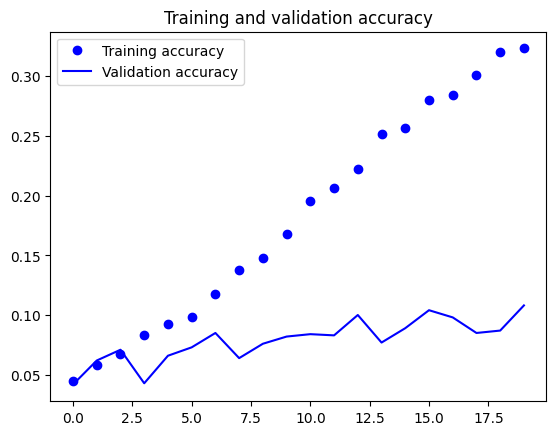

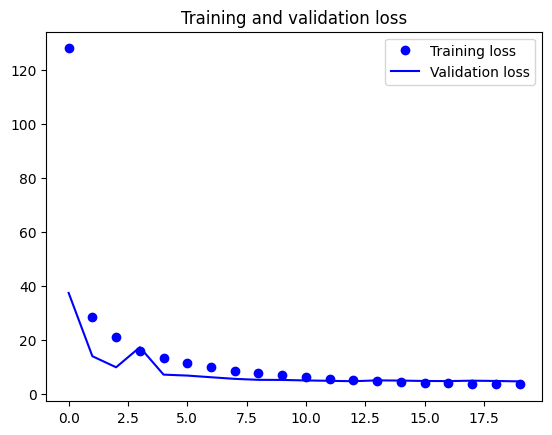

In [46]:
accuracy = razasimagenes_train_dropout.history['accuracy'] #Presición 
val_accuracy = razasimagenes_train_dropout.history['val_accuracy'] #Valor de la presición
loss = razasimagenes_train_dropout.history['loss'] #Perdida
val_loss = razasimagenes_train_dropout.history['val_loss'] #Valor de la perdida
epochs = range(len(accuracy)) #Epocas
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Predicción sobre el conjunto de datos de prueba.

test_X: Contiene las imágenes del conjunto de datos de prueba.

razasimagenes_model.predict(test_X): Aplica el modelo entrenado para realizar predicciones sobre las imágenes del conjunto de datos de prueba. 

El resultado, predicted_classes2, contendrá las predicciones del modelo para cada imagen en test_X.

In [47]:
predicted_classes2 = razasimagenes_model.predict(test_X)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


Este segmento de código realiza una operación de postprocesamiento en las predicciones obtenidas del modelo.

Este código transforma las predicciones del modelo en las clases finales predichas. Cada elemento en predicted_classes es la clase predicha para la imagen correspondiente en el conjunto de datos de prueba. 

In [48]:
predicted_classes=[]
for predicted_razasimagenes in predicted_classes2:
    predicted_classes.append(predicted_razasimagenes.tolist().index(max(predicted_razasimagenes)))
predicted_classes=np.array(predicted_classes)

predicted_classes.shape: Devuelve la forma (número de elementos en cada dimensión) del array predicted_classes.

test_Y.shape: Devuelve la forma del array test_Y.

In [49]:
predicted_classes.shape, test_Y.shape

((998,), (998,))

### Lo Correcto e Incorrecto del modelo.

Este segmento de código visualiza algunas de las predicciones correctas del modelo en comparación con las etiquetas reales en el conjunto de datos de prueba.

Cada subplot representa una imagen, con la clase predicha y la clase real indicadas en el título.

Found 108 correct labels


C:\Users\Lalo\AppData\Local\Temp\ipykernel_3380\1574215832.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


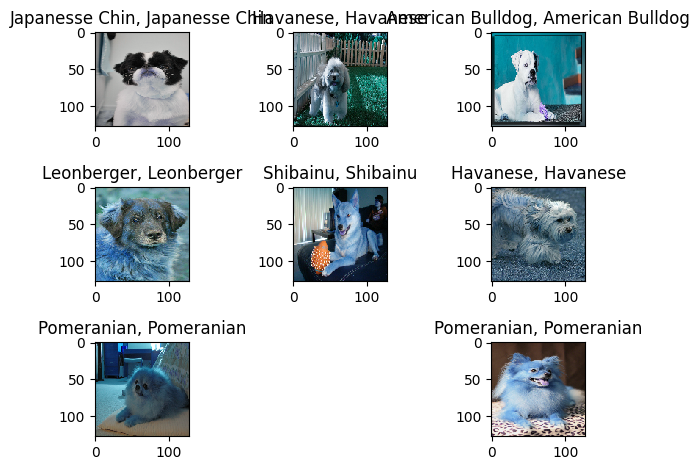

In [50]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(128,128,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(razas[predicted_classes[correct]],
                                                    razas[test_Y[correct]]))

    plt.tight_layout()

Este código muestra visualmente algunas de las predicciones incorrectas del modelo junto con las etiquetas reales en el conjunto de datos de prueba.

Cada subplot representa una imagen, con la clase predicha y la clase real indicadas en el título.

Found 890 incorrect labels


C:\Users\Lalo\AppData\Local\Temp\ipykernel_3380\3633987472.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


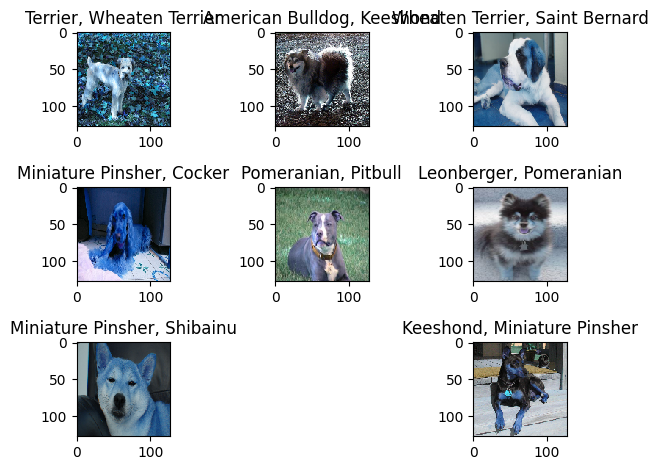

In [51]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(128,128,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(razas[predicted_classes[incorrect]],
                                                    razas[test_Y[incorrect]]))
    plt.tight_layout()

### Generación del Reporte de las metricas de clasificación.

Este informe nos proporcionará métricas de rendimiento del modelo para cada clase, así como promedios ponderados y promedios generales.

Al incluir el informe mostrará los nombres de clase específicos en lugar de simplemente "0", "1", que es al codificación one-hot

In [52]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.26      0.10      0.15        49
     Class 1       0.11      0.10      0.11        40
     Class 2       0.10      0.11      0.10        46
     Class 3       0.09      0.12      0.10        41
     Class 4       0.04      0.03      0.03        35
     Class 5       0.11      0.10      0.10        42
     Class 6       0.00      0.00      0.00        39
     Class 7       0.25      0.02      0.04        45
     Class 8       0.27      0.09      0.13        47
     Class 9       0.07      0.10      0.08        39
    Class 10       0.18      0.28      0.22        32
    Class 11       0.29      0.09      0.14        45
    Class 12       0.09      0.14      0.11        43
    Class 13       0.04      0.03      0.03        34
    Class 14       0.08      0.41      0.14        29
    Class 15       0.08      0.02      0.04        41
    Class 16       0.14      0.38      0.20        40
    Class 17       0.09    

Este proyecto consistió en el desarrollo de un clasificador de imágenes de razas de perros utilizando Python y varias bibliotecas populares como TensorFlow, Keras, NumPy, Matplotlib y scikit-learn. A continuación, se presenta un resumen de los aspectos clave del proyecto:

Objetivo del proyecto: El objetivo principal fue entrenar un modelo de aprendizaje profundo capaz de clasificar imágenes de perros en diferentes razas.

Obtención de datos: Se utilizó un conjunto de datos que contiene imágenes de varias razas de perros. Estas imágenes se organizaron en subdirectorios, cada uno correspondiente a una raza de perro específica.

Preprocesamiento de datos: Se realizaron diversas tareas de preprocesamiento de datos, como la carga de imágenes, la redimensión de imágenes a un tamaño uniforme, la normalización de píxeles y la división del conjunto de datos en conjuntos de entrenamiento y prueba.

Desarrollo del modelo: Se construyó un modelo de clasificación de imágenes utilizando la API de alto nivel de Keras en TensorFlow. El modelo consistió en capas de convolución, capas de agrupación, capas de activación, capas completamente conectadas y capas de regularización para evitar el sobreajuste.

Entrenamiento del modelo: El modelo se entrenó utilizando el conjunto de datos de entrenamiento y se evaluó su rendimiento utilizando el conjunto de datos de prueba. Se utilizaron métricas como la precisión para evaluar el rendimiento del modelo.

Optimización del modelo: Se realizaron ajustes en la arquitectura del modelo, así como en los hiperparámetros como la tasa de aprendizaje, el tamaño del lote y el número de épocas para mejorar el rendimiento del modelo.

Guardado del modelo: Una vez entrenado el modelo, se guardó en formato HDF5 (.h5) para su uso futuro.

Análisis de resultados: Se realizaron análisis detallados de los resultados, incluida la visualización de la precisión y la pérdida durante el entrenamiento, así como la visualización de imágenes correcta e incorrectamente clasificadas.

Resolución de problemas: Se abordaron varios problemas y errores durante el desarrollo del proyecto, como errores de sintaxis, advertencias de deprecación, problemas de compatibilidad entre versiones de bibliotecas, etc.

En resumen, el proyecto involucró la implementación completa de un clasificador de imágenes de razas de perros, desde la obtención y preprocesamiento de datos hasta el desarrollo, entrenamiento y evaluación del modelo. Se realizaron ajustes y correcciones según fuera necesario para mejorar el rendimiento del modelo y garantizar su funcionamiento correcto. El proyecto proporcionó una experiencia práctica en el desarrollo de aplicaciones de aprendizaje profundo para la clasificación de imágenes.